In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import math
from scipy.stats import f
import numpy as np

# Wstępna obróbka danych

In [ ]:
data = pd.ExcelFile('daneProj3.xlsx')
# Wczytanie pierwszego arkusza
df = data.parse('Arkusz1')
print("Informacje o danych:")
print(df.info())

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nazwa               380 non-null    object 
 1   gestoscZaludnienia  380 non-null    float64
 2   ludnoscTys          380 non-null    float64
 3   wskUrban            380 non-null    float64
 4   turystyka           380 non-null    int64  
 5   wynagrodzenie       380 non-null    float64
 6   bezrobocie          380 non-null    float64
 7   odpadyTysTon        380 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 23.9+ KB
None


In [ ]:
# Wykluczenie kolumny z nazwami powiatów
if 'Nazwa' in df.columns:
    df = df.drop(columns=['Nazwa'])

# Definiowanie zmiennej zależnej i objaśniających
df_y = df[['odpadyTysTon']]

df.drop(columns=['odpadyTysTon'])


,gestoscZaludnienia,ludnoscTys,wskUrban,turystyka,wynagrodzenie,bezrobocie
0,67.5,87.92,47.1,17,6181.60,3.1
1,200.3,95.86,78.2,19,5723.65,5.2
2,193.3,85.69,73.4,9,5856.76,6.4
3,44.3,32.74,41.1,1,5423.11,13.8
4,81.9,47.58,53.6,14,6142.84,10.2
...,...,...,...,...,...,...
375,35.6,50.39,61.0,21,5886.05,8.5
376,31.7,33.76,53.8,6,5630.58,15.2
377,1060.0,104.24,100.0,17,6054.77,5.1
378,1302.5,391.57,100.0,59,6943.84,3.1


In [ ]:
print("\nPodgląd przykłądowych danych:")
df.head()


Podgląd przykłądowych danych:


,gestoscZaludnienia,ludnoscTys,wskUrban,turystyka,wynagrodzenie,bezrobocie,odpadyTysTon
0,67.5,87.92,47.1,17,6181.60,3.1,10.56
1,200.3,95.86,78.2,19,5723.65,5.2,59.76
2,193.3,85.69,73.4,9,5856.76,6.4,17.89
3,44.3,32.74,41.1,1,5423.11,13.8,25.50
4,81.9,47.58,53.6,14,6142.84,10.2,31.36


In [ ]:
# Sprawdzanie brakujących danych
missing_data = df.isnull().sum()
print("\nBrakujące dane w kolumnach:")
print(missing_data)


Brakujące dane w kolumnach:
gestoscZaludnienia    0
ludnoscTys            0
wskUrban              0
turystyka             0
wynagrodzenie         0
bezrobocie            0
odpadyTysTon          0
dtype: int64


In [ ]:
# Podstawowe statystyki opisowe
descriptive_stats = df.describe()
print("\nPodstawowe statystyki opisowe:")
print(descriptive_stats)


Podstawowe statystyki opisowe:
       gestoscZaludnienia   ludnoscTys    wskUrban   turystyka  wynagrodzenie  \
count          380.000000   380.000000  380.000000  380.000000     380.000000   
mean           355.416842    99.385579   50.347105   25.700000    5826.572158   
std            627.797215   123.772237   27.426508   49.233486     705.880874   
min             18.200000    18.800000    0.000000    0.000000    4668.600000   
25%             57.850000    51.992500   30.575000    6.000000    5410.520000   
50%             89.800000    74.215000   44.850000   11.000000    5670.970000   
75%            180.075000   108.192500   63.300000   22.000000    6031.412500   
max           3600.100000  1861.980000  100.000000  441.000000   11361.510000   

       bezrobocie  odpadyTysTon  
count  380.000000    380.000000  
mean     7.263684     35.316895  
std      3.994963     53.449047  
min      1.000000      4.220000  
25%      4.400000     15.402500  
50%      6.350000     23.570000  


📌 widzimy potrzebę do przeprowadzenia standaryzacji danych ponieważ regresja liniowa jest podatna na różne skale danych objaśniających

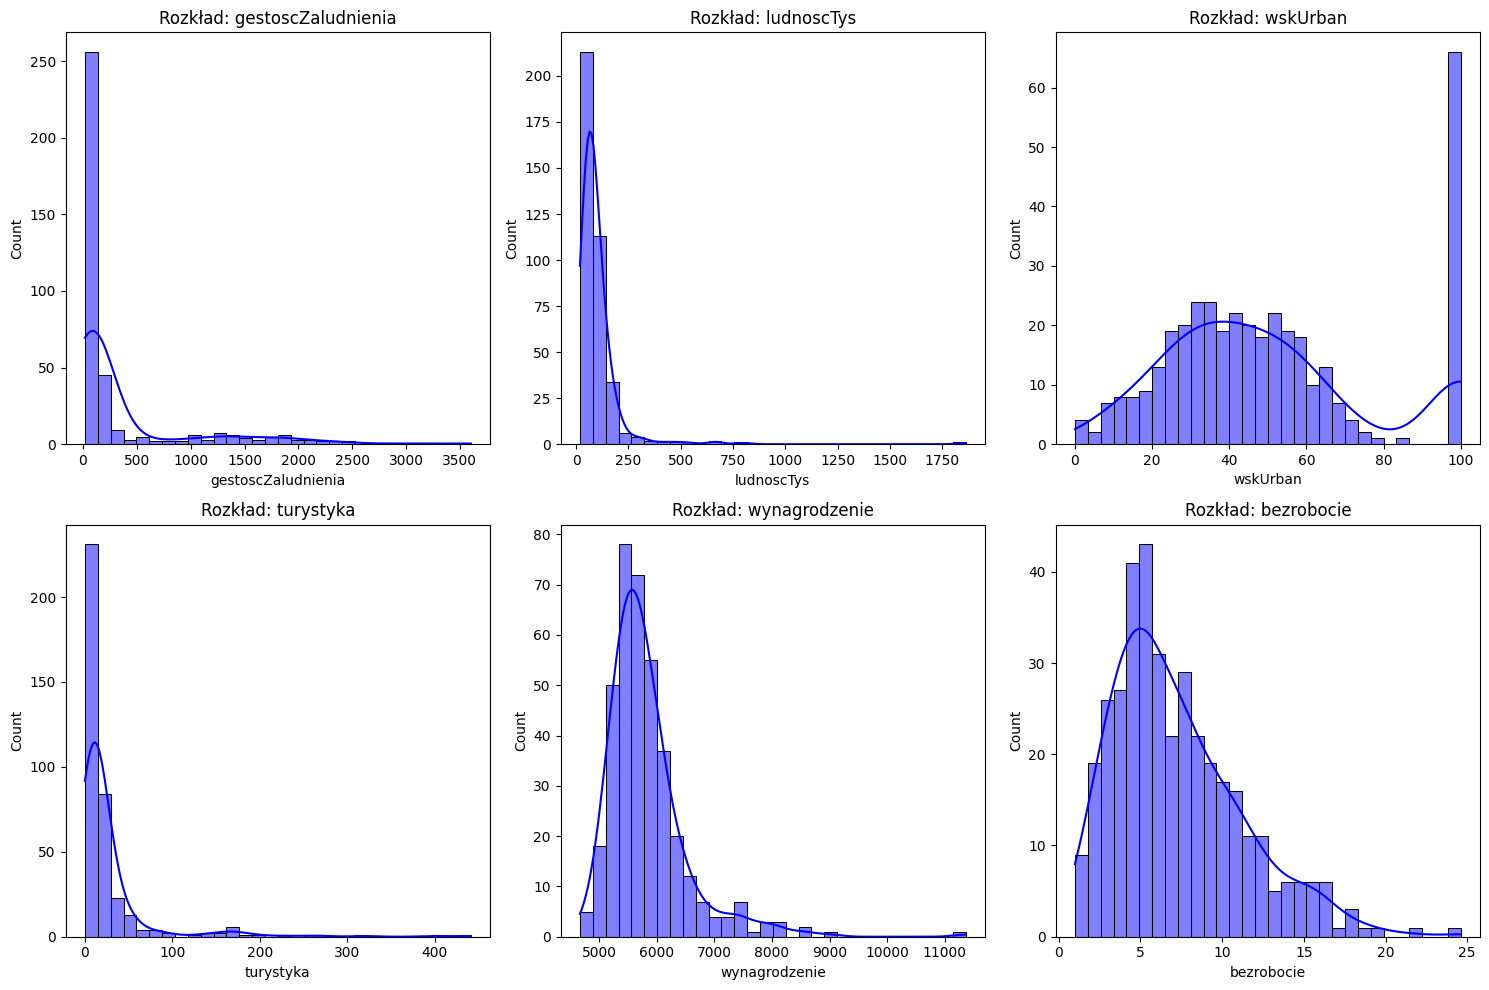

In [ ]:
# Analiza rozkładów zmiennych liczbowych
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns[:6]
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Rozkład: {column}")
plt.tight_layout()
plt.show()

📌 Po zwizualizowaniu rozkładów potwierdza się wcześniejszy wniosek wynikający ze statystyk opisowych - zmienne znacznie różnią się od siebie rozkładem oraz skalą, z uwagi na użycie regresji liniowej będzie konieczne zestandaryzowanie danych przed przejściem do tworzenia modelu.

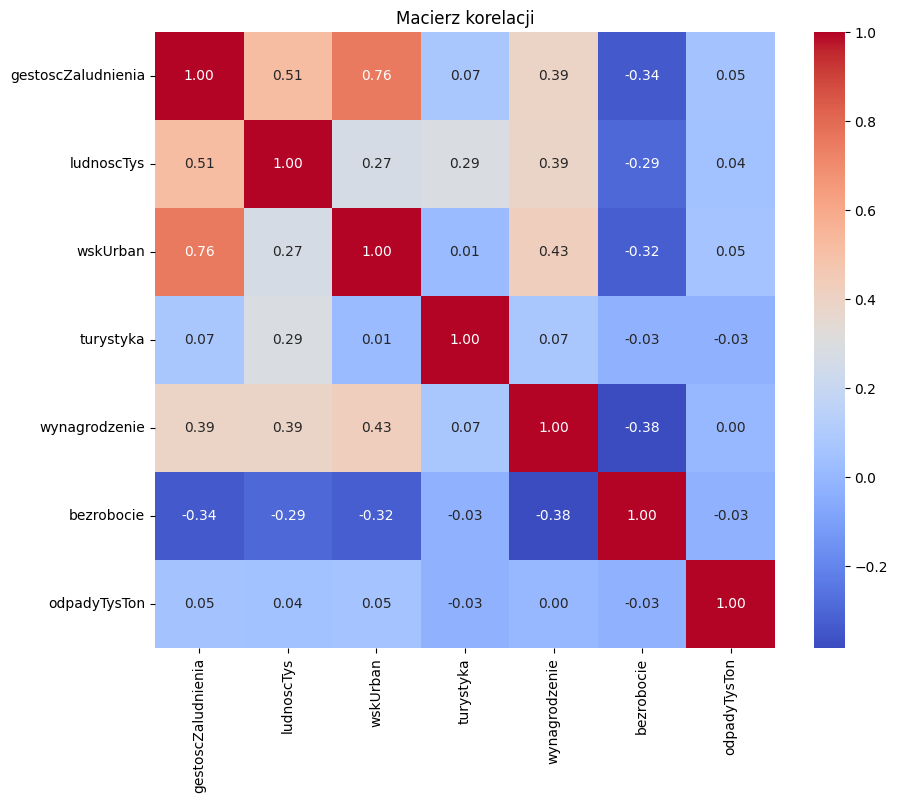

In [ ]:
# Macierz korelacji
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Macierz korelacji")
plt.show()

📌 Usuwamy zmienna wskaznikUrban poniewaz wykazuje wysoką korelację z gęstością zaludnienia, a w modelu zmiene objaśniające powinny być silnie skorelowane ze zmienną objaśnianą (odpady komunalne) ale nie powinny być skorelowane między sobą.

In [ ]:
# Standaryzacja zmiennych liczbowych
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_standardized = df.copy()
df_standardized[numerical_columns] = scaler.fit_transform(df_standardized[numerical_columns])

# Usunięcie kolumny wskUrban
df_standardized = df_standardized.drop(columns=['wskUrban'])

# Wyświetlenie pierwszych wierszy po standaryzacji i usunięciu kolumny (opcjonalnie)
df_standardized.head()

,gestoscZaludnienia,ludnoscTys,turystyka,wynagrodzenie,bezrobocie,odpadyTysTon
0,-0.459219,-0.092757,-0.176942,0.503620,-1.043607,-0.463797
1,-0.247407,-0.028522,-0.136266,-0.145999,-0.517253,0.457919
2,-0.258572,-0.110797,-0.339647,0.042823,-0.216478,-0.326477
3,-0.496222,-0.539163,-0.502352,-0.572326,1.638296,-0.183910
4,-0.436251,-0.419108,-0.237956,0.448638,0.735973,-0.074129


# Tworzenie modelu

In [ ]:
X = df_standardized  # Zmienne objaśniające
if 'odpadyTysTon' in X.columns:
    X = X.drop(columns=['odpadyTysTon'])
y = df_y['odpadyTysTon']  # Zmienna objaśniana

In [ ]:
# dodanie stałej do modelu
X = sm.add_constant(X)
# Budowa modelu liniowego  przy użyciu metody najmniejszych kwadratów
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           odpadyTysTon   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3959
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.852
Time:                        14:08:54   Log-Likelihood:                -2049.6
No. Observations:                 380   AIC:                             4111.
Df Residuals:                     374   BIC:                             4135.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 35.3169      2

In [ ]:
# Wyciągnięcie kluczowych metryk
r_squared = model.rsquared
adj_r_squared = model.rsquared_adj
f_statistic = model.fvalue
p_value = model.f_pvalue

print("\nPodstawowe miary jakości dopasowania:")
print(f"R-kwadrat: {r_squared:.3f}")
print(f"Skorygowane R-kwadrat: {adj_r_squared:.3f}")
print(f"Statystyka F: {f_statistic:.3f} (p-value: {p_value:.3f})")


Podstawowe miary jakości dopasowania:
R-kwadrat: 0.005
Skorygowane R-kwadrat: -0.008
Statystyka F: 0.396 (p-value: 0.852)


📌Tak słabe wyniki mogą wynikać międzyinnymi z tego, że w naszych zmiennych były wartości odstające, postaramy się je teraz usunąć aby poprawić wyniki modelu, następnie powtórzymy te same kroki.

In [ ]:
# Zidentyfikowanie outlierów metodą IQR
def remove_outliers_iqr(df, columns, threshold=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Lista kolumn, z których chcemy usunąć outliery
columns_to_check = ['gestoscZaludnienia', 'ludnoscTys', 'turystyka', 'wynagrodzenie', 'bezrobocie']

# Usunięcie outlierów
df_filtered = remove_outliers_iqr(df_standardized, columns_to_check)
df_filtered = df_filtered.reset_index(drop=True)

# Przygotowanie danych po usunięciu outlierów
X_filtered = df_filtered.drop(columns=['odpadyTysTon'])
if 'odpadyTysTon' in X_filtered.columns:
    X_filtered = X_filtered.drop(columns=['odpadyTysTon'])
y_filtered = df_filtered['odpadyTysTon']

# Standaryzacja zmiennych objaśniających
scaler = StandardScaler()
X_filtered = pd.DataFrame(scaler.fit_transform(X_filtered), columns=X_filtered.columns)

# Dodanie stałej do modelu
X_filtered = sm.add_constant(X_filtered)

# Budowa modelu liniowego po usunięciu outlierów
model_filtered = sm.OLS(y_filtered, X_filtered).fit()

# Wyświetlenie wyników modelu
print(model_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:           odpadyTysTon   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.818
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.110
Time:                        14:08:58   Log-Likelihood:                -365.10
No. Observations:                 248   AIC:                             742.2
Df Residuals:                     242   BIC:                             763.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0216      0

In [ ]:
# Porównanie jakości dopasowania z wcześniejszym modelem
print("\nPorównanie jakości dopasowania:")
print(f"R-kwadrat (po usunięciu outlierów): {model_filtered.rsquared:.3f}")
print(f"Skorygowane R-kwadrat (po usunięciu outlierów): {model_filtered.rsquared_adj:.3f}")


Porównanie jakości dopasowania:
R-kwadrat (po usunięciu outlierów): 0.036
Skorygowane R-kwadrat (po usunięciu outlierów): 0.016


📌Widzimy poprawę wyników chociaż dalej nie są one idealne, może wynikać to z faktu, że nasze zmienne są zmiennymi przestrzennymi, co nie jest uwzględniane przez model liniowy.

Statystyka Durbin-Watson (1.945):

Wartość bliska 2 sugeruje brak autokorelacji reszt, co jest pozytywnym sygnałem dla stabilności modelu.

Większość zmiennych ma wysokie p-wartości (> 0.05), co oznacza brak istotnego wpływu na zmienną zależną.
Tylko wynagrodzenie jest statystycznie istotne (p = 0.008), co może oznaczać, że wpływa na odpadyTysTon



Przechodzimy do badania stabilności parametrów modelu - przeprowadzamy test Chowa

In [ ]:
# Podział danych na dwie równe części
split_index = len(X_filtered) // 2
X_part1, X_part2 = X_filtered.iloc[:split_index], X_filtered.iloc[split_index:]
y_part1, y_part2 = y_filtered.iloc[:split_index], y_filtered.iloc[split_index:]

# Oszacowanie modelu dla pierwszej części
model_part1 = sm.OLS(y_part1, X_part1).fit()
SSE1 = np.sum(model_part1.resid ** 2)

# Oszacowanie modelu dla drugiej części
model_part2 = sm.OLS(y_part2, X_part2).fit()
SSE2 = np.sum(model_part2.resid ** 2)

# Oszacowanie modelu dla całego zbioru danych
model_full = sm.OLS(y_filtered, X_filtered).fit()
SSE_full = np.sum(model_full.resid ** 2)

# Obliczenie statystyki F dla testu Chow'a
k = X_filtered.shape[1]  # Liczba parametrów (w tym stała)
n1 = len(y_part1)
n2 = len(y_part2)

numerator = (SSE_full - (SSE1 + SSE2)) / k
denominator = (SSE1 + SSE2) / (n1 + n2 - 2 * k)
F_chow = numerator / denominator

# Obliczenie p-wartości
df1 = k  # Stopnie swobody w liczniku
df2 = n1 + n2 - 2 * k  # Stopnie swobody w mianowniku
p_value = f.sf(F_chow, df1, df2)  # sf = 1 - cdf

print(f"Statystyka F dla testu Chow'a: {F_chow:.4f}")
print(f"p-value: {p_value:.4f}")

Statystyka F dla testu Chow'a: 0.4890
p-value: 0.8163


H₀ (hipoteza zerowa): Parametry modelu są takie same w obu podzbiorach (Model regresji jest stabilny, a dane mogą być analizowane za pomocą jednego zestawu parametrów.).


H₁ (hipoteza alternatywna): Parametry modelu różnią się między podzbiorami (model nie jest stabilny).
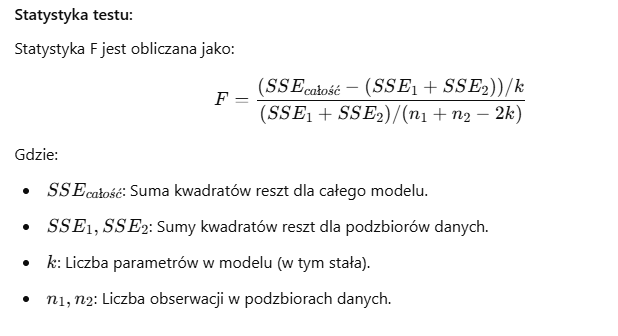

P-value wynosi 0.68 zatem jest brak podstaw do odrzucenia Hipotezy zerowej, przyjmujemy więc że model jest stabilny.